In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

/home/zii-de/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

In [3]:
df = pd.read_csv('Castalia-Trace.txt', header=None, sep='\t', names=['time', 'entity', 'event'])

# mark experiment number
reps = 0
df['reps'] = 0
for idx, row in df.iterrows():
    if pd.notnull(row.event) and 'sending' in row.event:
        reps += 1
    df.set_value(idx, 'reps', reps)

df

,time,entity,event,reps
0,0.027540,SN.node[0].Application,Not sending packets,1
1,18.753632,SN.node[5].Application,Sending packet #0,1
2,21.072526,SN.node[18].Application,Sending packet #0,1
3,70.402864,SN.node[8].Application,Sending packet #0,1
4,70.568286,SN.node[0].Application,Received packet #0 from node 8,1
...,...,...,...,...
5164,14270.357898,SN.node[7].Application,Sending packet #16,5
5165,14286.660679,SN.node[10].Application,Sending packet #16,5
5166,14308.756609,SN.node[34].Application,Sending packet #6,5
5167,14370.087464,SN.node[40].Application,Sending packet #10,5


In [4]:
sending = df[df.event.str.contains('Sending')]
sending['from_node'] = sending.entity.apply(lambda x: int(re.search(r"\[([0-9]+)\]", x).group(1)))
sending['sequence_number'] = sending.event.apply(lambda x: int(re.search(r"#([0-9]+)", x).group(1)))
del sending['entity'], sending['event']
sending

/home/zii-de/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/zii-de/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,time,reps,from_node,sequence_number
1,18.753632,1,5,0
2,21.072526,1,18,0
3,70.402864,1,8,0
5,78.060077,1,5,1
6,87.090722,1,4,0
...,...,...,...,...
5163,14260.755388,5,10,15
5164,14270.357898,5,7,16
5165,14286.660679,5,10,16
5166,14308.756609,5,34,6


In [5]:
receiving = df[df.event.str.contains('Received packet')]
receiving['from_node'] = receiving.event.apply(lambda x: int(re.search(r"node ([0-9]+)", x).group(1)))
receiving['sequence_number'] = receiving.event.apply(lambda x: int(re.search(r"#([0-9]+)", x).group(1)))
del receiving['entity'], receiving['event']
receiving

/home/zii-de/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/zii-de/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,time,reps,from_node,sequence_number
4,70.568286,1,8,0
11,204.760647,1,43,0
15,229.482768,1,23,0
19,293.156023,1,50,0
22,310.566667,1,7,0
...,...,...,...,...
5146,13871.813878,5,30,12
5150,13926.735521,5,24,18
5154,14085.713108,5,3,19
5157,14107.476831,5,45,9


In [6]:
merged = pd.merge(sending, receiving, on=['from_node', 'sequence_number', 'reps'], 
                  suffixes=('_sent', '_received'), how='left')
merged

,time_sent,reps,from_node,sequence_number,time_received
0,18.753632,1,5,0,NaN
1,21.072526,1,18,0,NaN
2,70.402864,1,8,0,70.568286
3,78.060077,1,5,1,NaN
4,87.090722,1,4,0,NaN
...,...,...,...,...,...
4017,14260.755388,5,10,15,NaN
4018,14270.357898,5,7,16,NaN
4019,14286.660679,5,10,16,NaN
4020,14308.756609,5,34,6,NaN


In [7]:
merged[merged.time_received.isnull()].from_node.value_counts()

32    95
47    83
18    82
37    78
26    78
      ..
5     30
41    28
30    24
33    22
43    11
Name: from_node, dtype: int64

In [8]:
latencies = merged.groupby(['from_node', 'reps'])\
                .apply(lambda x: (x.time_received - x.time_sent).quantile(.95) * 1000).unstack()
latencies

reps,1,2,3,4,5
from_node,,,,,
1,NaN,45.172546,NaN,NaN,NaN
2,NaN,53.538930,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,33.553970
4,NaN,NaN,NaN,NaN,NaN
5,NaN,51.740238,37.013142,NaN,40.900205
...,...,...,...,...,...
47,NaN,NaN,NaN,NaN,NaN
48,NaN,52.993328,NaN,NaN,NaN
49,NaN,48.721103,NaN,NaN,NaN


In [ ]:
# TODO: max latency

In [10]:
latencies.describe()

reps,1,2,3,4,5
count,18.000000,21.000000,13.000000,7.000000,14.000000
mean,149.454289,42.886621,67.845083,110.980085,36.221227
std,29.666279,9.327147,46.342331,59.597104,10.473535
min,39.135680,14.684940,35.622258,43.877677,17.787287
25%,145.706240,38.283121,41.574406,49.335788,30.334967
50%,156.687341,45.655289,44.770129,153.360962,36.467988
75%,161.919132,48.554117,55.719947,157.051928,42.535006
max,177.860294,53.538930,164.536931,166.846524,54.420015


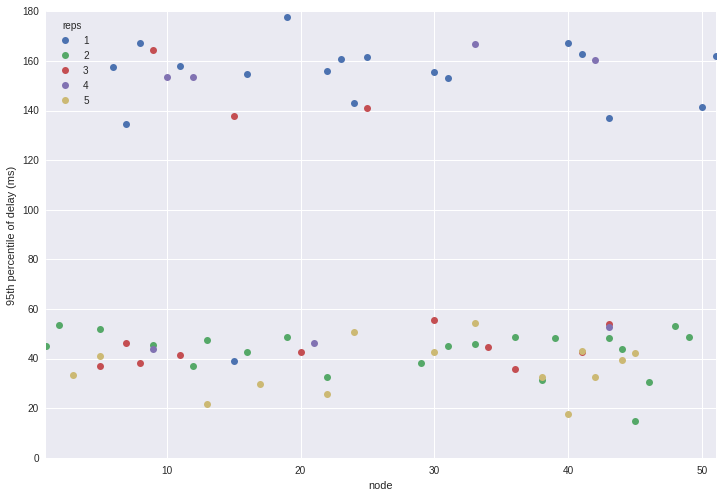

In [9]:
ax = latencies.plot(style='o', figsize=(12, 8))
ax.set_xlabel('node')
ax.set_ylabel('95th percentile of delay (ms)')
#ax.set_ylim((0, 200))